       O trabalho apresenta uma EDO sobre a populaçao de adultos e crianças em função do tempo, para ver como variam já que um depende do outro,foram escolhidos os métodos de Euler,Euler-Cromer e RG4.
        As equações são as seguintes:
        C(i + h) = C(i) + A(i)rep -C(i)mi -C(i)e
        A(i + h) = A(i) + C(i)e -A(i)ma
        onde, 
        C = população de crianças;
        A = população de adultos;
        rep = constante de reprodução;
        mi = constante mortalidade infantil;
        ma = constante mortalidade adulta;
        e = constante envelhecimento.
        O esperado é que, a medida que as crianças vão crescendo a população de adultos aumente (de crianças diminui) e após um tempo ela volte a crescer, já que os adultos "geram" crianças.
        O método de Euler explícito utiliza o passo anterior para calcular o próximo; O método de Euler-Cromer é similar ao anterior, porém para calcular a segunda equação ele utiliza o passo atual(baseado no resultado da primeira equação);RG4 utiliza alguns passos intermediários denominados k(n) para calcular o próximo passo(n+1).
        Foram criados gráficos da população de crianças e adultos em função do tempo e também de adultos x crianças, e eles correspondem.
        

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
SMALL_SIZE = 19
MEDIUM_SIZE = 25
BIGGER_SIZE = 30


plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.rcParams['font.family'] = "serif"

plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['axes.linewidth'] = 2

<Figure size 720x576 with 0 Axes>

No handles with labels found to put in legend.


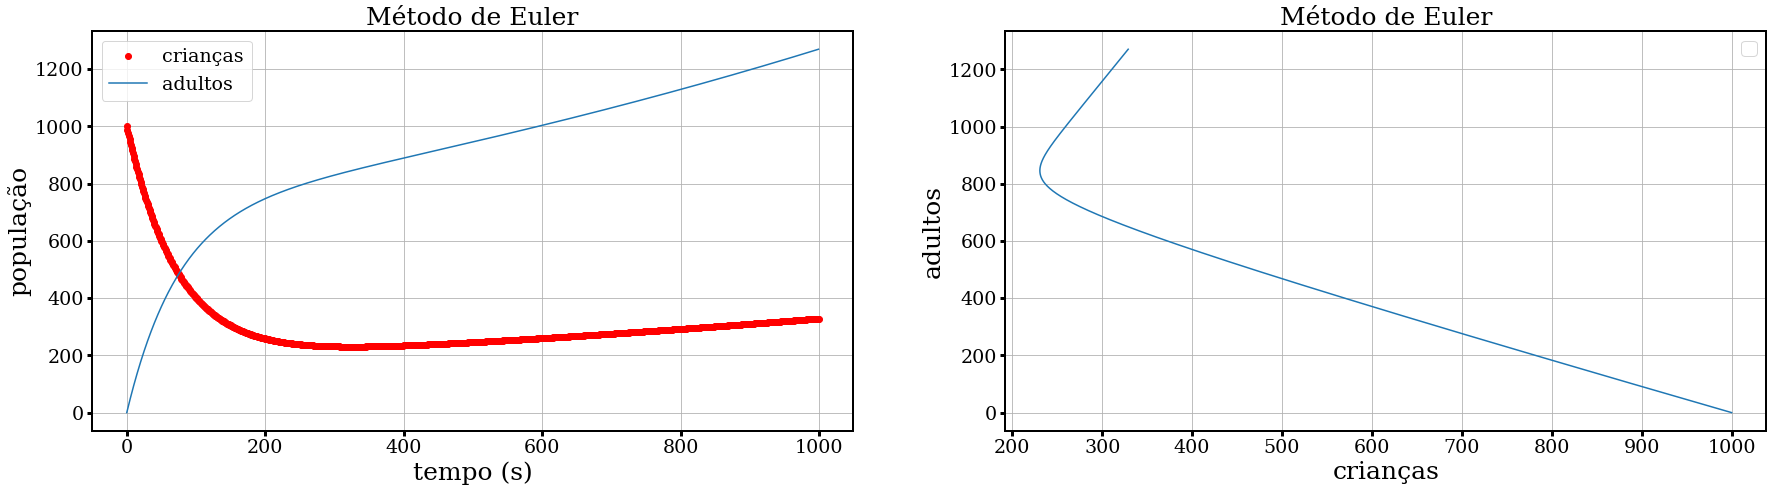

In [751]:
#Método de Euler
t=np.arange(0,1000,1)
c=np.empty(1001)
a=np.empty(1001)
mi=0.01 #mortalidade infantil
ma=0.02 #mortalidade adulta
rep=0.03 #reproduçao
e=0.1 #envelhecimento
dt=0.1
a[0]=0
c[0]=1000
for i in range(0,len(t)):
    c[i+1] = c[i] + (rep*a[i] -mi*c[i] -e*c[i] )*dt
    a[i+1] = a[i] + (c[i]*e -ma*a[i] ) *dt
    
   
plt.figure(figsize=(30,25))
plt.subplot(321)
plt.plot(t,c[0:-1],'o',color='red',label='crianças')
plt.plot(t,a[0:-1],label='adultos')
plt.title('Método de Euler')
plt.xlabel('tempo (s)')
plt.ylabel('população')
plt.grid()
plt.legend()


plt.subplot(322)
plt.plot(c,a)
plt.title('Método de Euler')
plt.xlabel('crianças')
plt.ylabel('adultos')
plt.grid()
plt.legend()


No handles with labels found to put in legend.


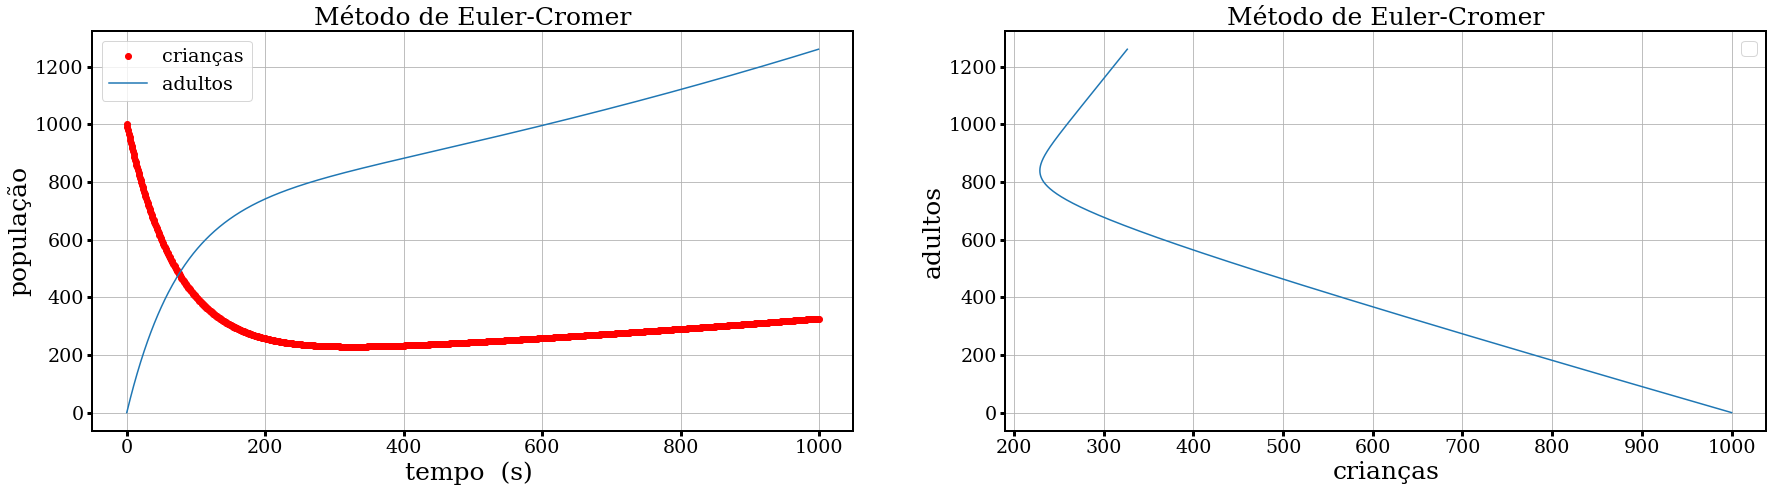

In [752]:
#euler-cromer
t=np.arange(0,1000,1)
cc=np.empty(1001)
aa=np.empty(1001)
mi=0.01 #mortalidade infantil
ma=0.02 #mortalidade adulta
rep=0.03 #reproduçao
e=0.1 #envelhecimento
dt=0.1
cc[0]=1000
aa[0]=0
for i in range(0,len(t)):
    cc[i+1] = cc[i] +( rep*aa[i] -mi*cc[i] -e*cc[i])*dt
    aa[i+1] = aa[i] +( cc[i+1]*e -ma*aa[i])*dt

plt.figure(figsize=(30,25))
plt.subplot(321)
plt.plot(t,cc[0:-1],'o',color='red',label='crianças')
plt.plot(t,aa[0:-1],label='adultos')
plt.title('Método de Euler-Cromer')
plt.xlabel('tempo  (s) ')
plt.ylabel('população')
plt.grid()
plt.legend()

plt.subplot(322)
plt.plot(cc,aa)
plt.title('Método de Euler-Cromer')
plt.xlabel('crianças')
plt.ylabel('adultos')
plt.grid()
plt.legend()


No handles with labels found to put in legend.


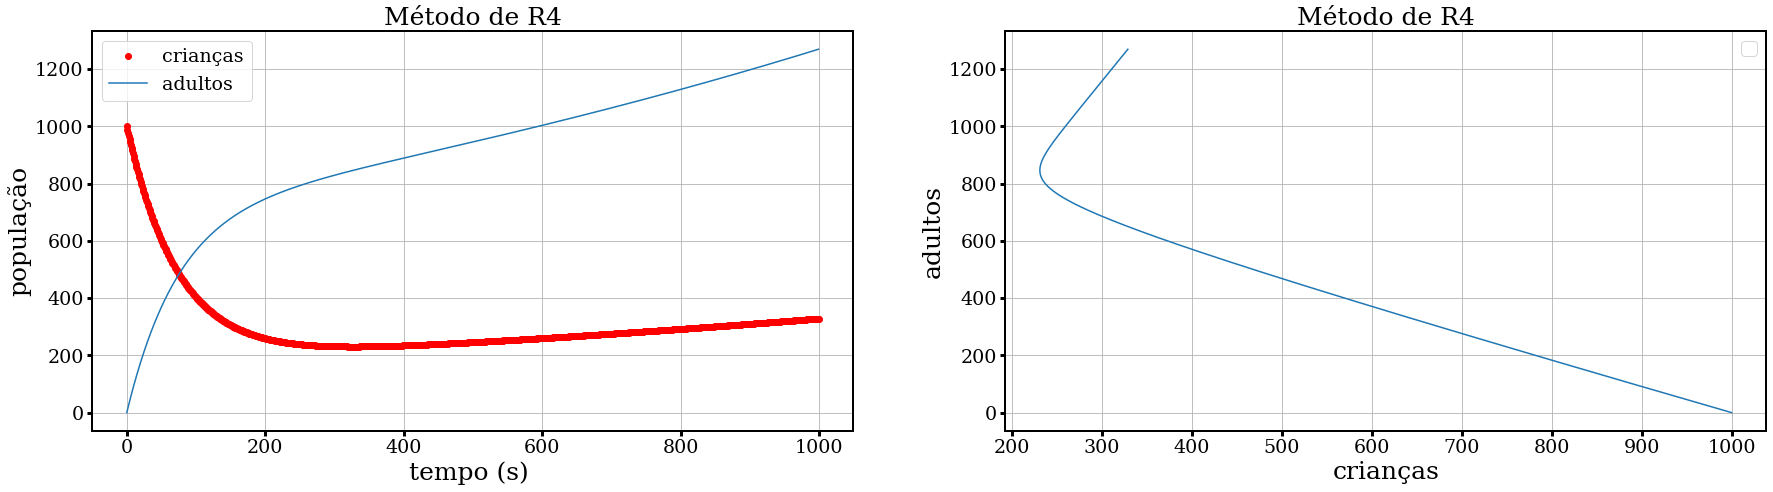

In [3]:
#RG4
mi = 0.01 #mortalidade infantil
ma = 0.02 #mortalidade adulta
rep = 0.03 #reproduçao
e = 0.1 #envelhecimento


def FC(x,y): #crianças(x)
    return  y*rep -x*mi -x*e

def FA(x,y) : #adultos(y)
    return  x*e -y*ma


def R4(FC ,FA, x0, y0, dt, n):
    y=[]
    x=[]
    t=[]
    y.append(y0)
    t.append(t0)
    x.append(x0)
   
    
    for i in range(1,n):
        
        k1  =   FC (x[i-1], y[i-1])
        k1a =   FA (x[i-1], y[i-1])
        
        k2  =   FC(x[i-1] + (dt/2)*k1, y[i-1] +(dt/2)*k1a)
        k2a =   FA(x[i-1] + (dt/2)*k1, y[i-1] +(dt/2)*k1a)
        
        k3  =   FC (x[i-1]  + (dt/2)*k2, y[i-1] +(dt/2)*k2a)
        k3a =   FA (x[i-1]  + (dt/2)*k2, y[i-1] +(dt/2)*k2a)
        
        k4  =   FC (x[i-1]  + dt*k3, y[i-1]  +dt*k3a)
        k4a =   FA (x[i-1]  + dt*k3, y[i-1]  +dt*k3a)
        
        x.append(x[i-1] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4))
        y.append(y[i-1] + (dt/6)*(k1a + 2*k2a + 2*k3a + k4a))  
         
    return x,y
y0 = 0                 
x0 = 1000
t0=0
tf=1000
dt=0.1
n = 1000
x, y = R4(FC,FA, x0,y0, dt, n)

t =np.arange(0,1000,1)
 

plt.figure(figsize=(30,25))
plt.subplot(321)
plt.plot(t,x,'o',color='red',label='crianças')
plt.plot(t,y,label='adultos')
plt.title('Método de R4')
plt.xlabel('tempo (s) ')
plt.ylabel('população')
plt.grid()
plt.legend()

plt.subplot(322)
plt.plot(x,y)
plt.title('Método de R4')
plt.xlabel('crianças')
plt.ylabel('adultos')
plt.grid()
plt.legend()




    Os gráficos de ambos métodos ficaram similares, como o modelo de R4 deve apresentar um resultado mais exato usaremos ele como parâmetro e calcular o erro dos métodos de Euler baseados nele:

In [754]:
#ERRO ABSOLUTO CRIANÇAS
erro1=[]
for i in range(len(c)): #Euler
    e1 =abs(x[i-1]-c[i-1])/100
    erro1.append(e1)
    
erro2=[]
for i in range(len(cc)):  #Euler-Cromer
    e2 = abs(x[i-1]-cc[i-1])/100
    erro2.append(e2)

Text(0, 0.5, 'erro absoluto %')

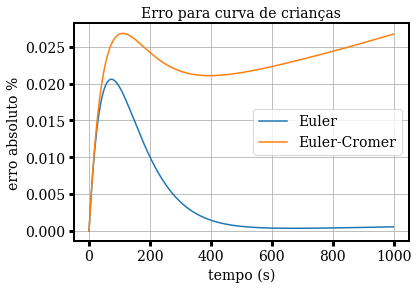

In [755]:
SMALL_SIZE = 14
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title

plt.plot(t,erro1[1:], label='Euler')
plt.plot(t,erro2[1:], label='Euler-Cromer')
plt.xlabel('tempo (s)')
plt.title('Erro para curva de crianças')
plt.grid()
plt.legend()
plt.ylabel('erro absoluto %')

Text(0, 0.5, 'erro absoluto %')

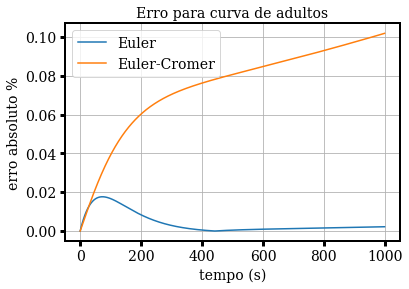

In [756]:
#ERRO ABSOLUTO ADULTOS
erro1=[]
for i in range(len(a)): #Euler
    e1 =abs(y[i-1]-a[i-1])/100
    erro1.append(e1)
    
erro2=[]
for i in range(len(cc)):  #Euler-Cro,er
    e2 = abs(y[i-1]-aa[i-1])/100
    erro2.append(e2)
    
SMALL_SIZE = 14
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title

plt.plot(t,erro1[1:], label='Euler')
plt.plot(t,erro2[1:], label='Euler-Cromer')
plt.xlabel('tempo (s)')
plt.title('Erro para curva de adultos')
plt.grid()
plt.legend()
plt.ylabel('erro absoluto %')

  O erro entre os métodos é bem baixo (comparado com o método de R4), para um passo de h=0.1 e as constantes definidas.O que achei estranho foi que o método de Euler acabou sendo mais preciso que o método de Euler-Cromer.Segue abaixo uma tabela com alguns valores das curvas calculadas para os três métodos:

In [748]:
import pandas as pd
#ADULTOS
df = pd.DataFrame([["100", a[99], aa[99], y[100]],
                       ["500", a[499], aa[499], y[500]],
                       ["900", a[899], aa[899], y[900]]],
                      columns = ["tempo(s)", "Euler", "Euler-Cromer", "RG4"])
df.set_index("tempo(s)")

,Euler,Euler-Cromer,RG4
tempo(s),,,
100,565.632931,560.068560,566.878447
500,945.360323,937.351384,945.974237
900,1197.261177,1187.724106,1198.153209


In [749]:
#CRIANÇAS
df = pd.DataFrame([["100", c[99], cc[99], x[100]],
                       ["500", c[499], cc[499], x[500]],
                       ["900", c[899], cc[899], x[900]]],
                      columns = ["tempo(s)", "Euler", "Euler-Cromer", "RG4"])
df.set_index("tempo(s)")

,Euler,Euler-Cromer,RG4
tempo(s),,,
100,404.501056,403.790751,403.700501
500,245.811460,243.727911,246.006655
900,309.942359,307.440480,310.173604
